In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import string
import demoji  


In [2]:
#data = pd.read_csv(file_path)  # 
data = pd.read_csv('../Data/reduced_reddit.csv', index_col=False)
print(data.head())  # Display the first few rows of the dataframe

   subreddit                                              title  \
0  teenagers                        Day 18 of doing 50 push-ups   
1  teenagers  There isn’t a better feeling than finishing yo...   
2  teenagers  LMAOOO I can only get this guy to talk to me i...   
3  teenagers                       This isn't going to work out   
4  teenagers  Am I the only guy who found it hurtful as a ch...   

                                                body  upvotes   created_utc  \
0                                                NaN      4.0  1.619357e+09   
1  Then your teacher hits you with that “ Good jo...      7.0  1.554103e+09   
2                              Yeahhh maybe not babe      4.0  1.649342e+09   
3                                                NaN    236.0  1.417630e+09   
4   \n\nLike... why? How is that funny? How does ...      6.0  1.569280e+09   

   num_comments  label  
0           4.0    0.0  
1           NaN    0.0  
2          12.0    0.0  
3          33.0    0.0

In [3]:

print(data.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98826 entries, 0 to 98825
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subreddit     98826 non-null  object 
 1   title         98826 non-null  object 
 2   body          80371 non-null  object 
 3   upvotes       98826 non-null  float64
 4   created_utc   98826 non-null  float64
 5   num_comments  94297 non-null  float64
 6   label         98826 non-null  float64
dtypes: float64(4), object(3)
memory usage: 5.3+ MB
None


In [4]:
print(data.columns)


Index(['subreddit', 'title', 'body', 'upvotes', 'created_utc', 'num_comments',
       'label'],
      dtype='object')


In [5]:
# Combine 'title' and 'body' into a new column called 'combined_text'
data['combined_text'] = data['title'].fillna('') + ' ' + data['body'].fillna('')

# Display the first few rows to confirm the new column
print(data[['title', 'body', 'combined_text']].head())


                                               title  \
0                        Day 18 of doing 50 push-ups   
1  There isn’t a better feeling than finishing yo...   
2  LMAOOO I can only get this guy to talk to me i...   
3                       This isn't going to work out   
4  Am I the only guy who found it hurtful as a ch...   

                                                body  \
0                                                NaN   
1  Then your teacher hits you with that “ Good jo...   
2                              Yeahhh maybe not babe   
3                                                NaN   
4   \n\nLike... why? How is that funny? How does ...   

                                       combined_text  
0                       Day 18 of doing 50 push-ups   
1  There isn’t a better feeling than finishing yo...  
2  LMAOOO I can only get this guy to talk to me i...  
3                      This isn't going to work out   
4  Am I the only guy who found it hurtful as a ch..

In [6]:
data['combined_text'] = data['title'].fillna('') + ' ' + data['body'].fillna('')


In [7]:
# Fill missing values for 'title' and 'body' columns
data['title'] = data['title'].fillna('')
data['body'] = data['body'].fillna('')

# Create 'combined_text' column
data['combined_text'] = data['title'] + ' ' + data['body']

# Convert text to lowercase
data['combined_text'] = data['combined_text'].str.lower()

# Remove punctuation and special characters
import re
data['combined_text'] = data['combined_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Optional: Remove numbers
data['combined_text'] = data['combined_text'].apply(lambda x: re.sub(r'\d+', '', x))



In [8]:
stop_words = set(stopwords.words('english')).union(set(string.punctuation))
custom_stopwords = {'additional', 'stopwords', 'to', 'add'}  # Converting custom stopwords to a set
stop_words.update(custom_stopwords)


In [9]:
print(data.columns)


Index(['subreddit', 'title', 'body', 'upvotes', 'created_utc', 'num_comments',
       'label', 'combined_text'],
      dtype='object')


In [10]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Download the tokenizer if not already done

# Tokenize 'combined_text' and create 'tokens' column
data['tokens'] = data['combined_text'].apply(lambda x: word_tokenize(x))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cecily\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
print(data[['combined_text', 'tokens']].head())


                                       combined_text  \
0                            day  of doing  pushups    
1  there isnt a better feeling than finishing you...   
2  lmaooo i can only get this guy to talk to me i...   
3                       this isnt going to work out    
4  am i the only guy who found it hurtful as a ch...   

                                              tokens  
0                          [day, of, doing, pushups]  
1  [there, isnt, a, better, feeling, than, finish...  
2  [lmaooo, i, can, only, get, this, guy, to, tal...  
3                 [this, isnt, going, to, work, out]  
4  [am, i, the, only, guy, who, found, it, hurtfu...  


In [12]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
# Apply lemmatization to each token in the 'tokens' column
data['tokens'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Cecily\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


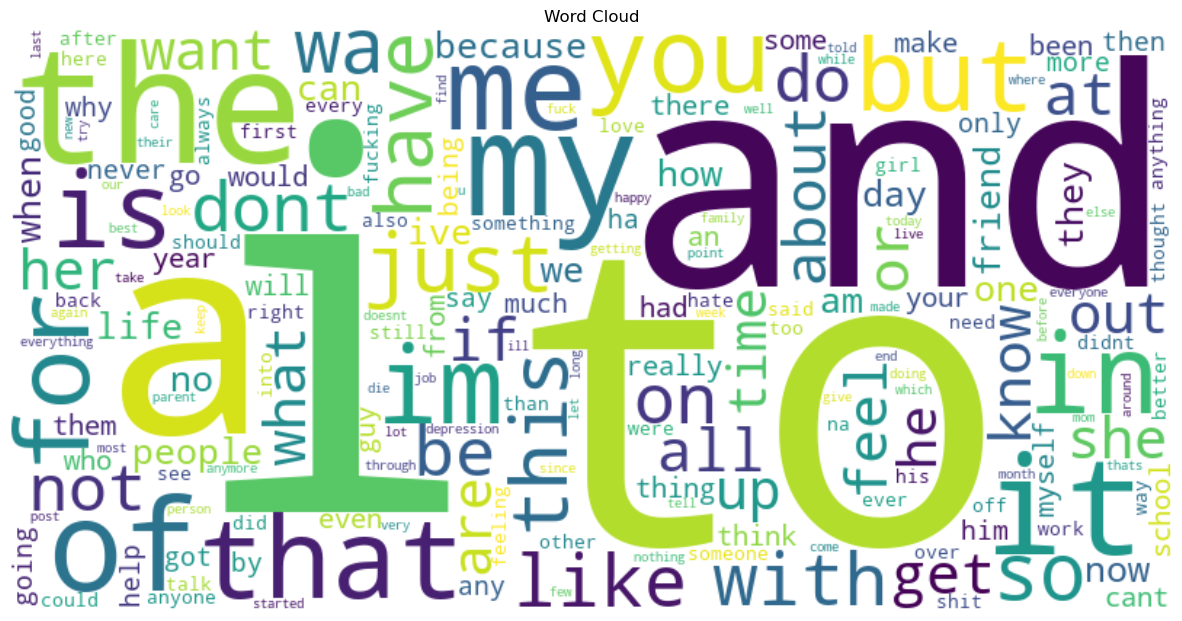

In [13]:
from nltk.probability import FreqDist

# Flatten tokens list for frequency distribution
all_tokens = [word for tokens in data['tokens'] for word in tokens]
freq_dist = FreqDist(all_tokens)

# Generate word cloud
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Plot word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


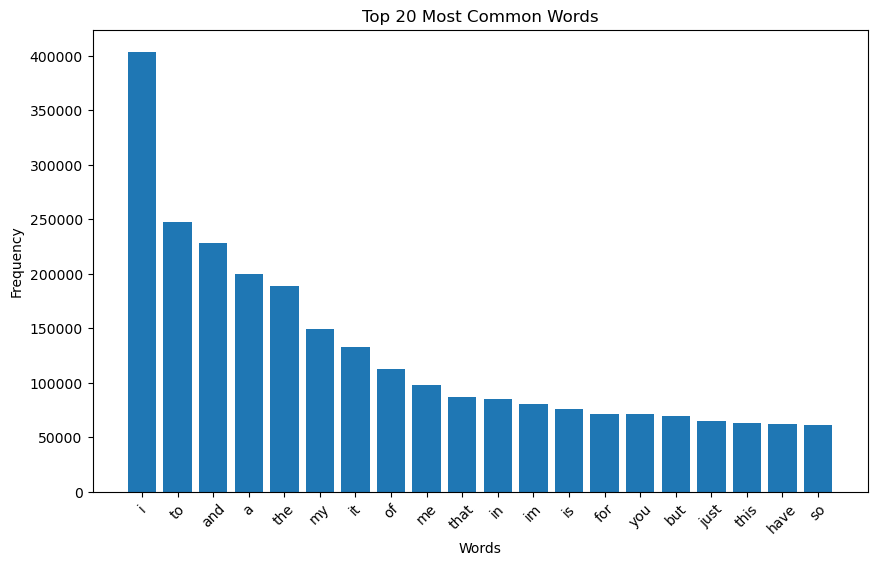

In [14]:
# Plot top 20 most common words
most_common_words = freq_dist.most_common(20)
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()


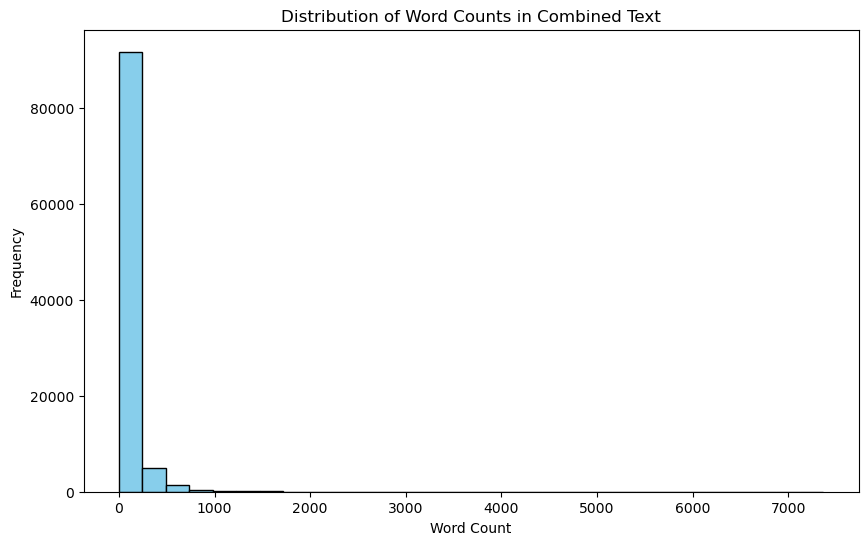

In [15]:
data['word_count'] = data['combined_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
plt.hist(data['word_count'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Combined Text')
plt.show()


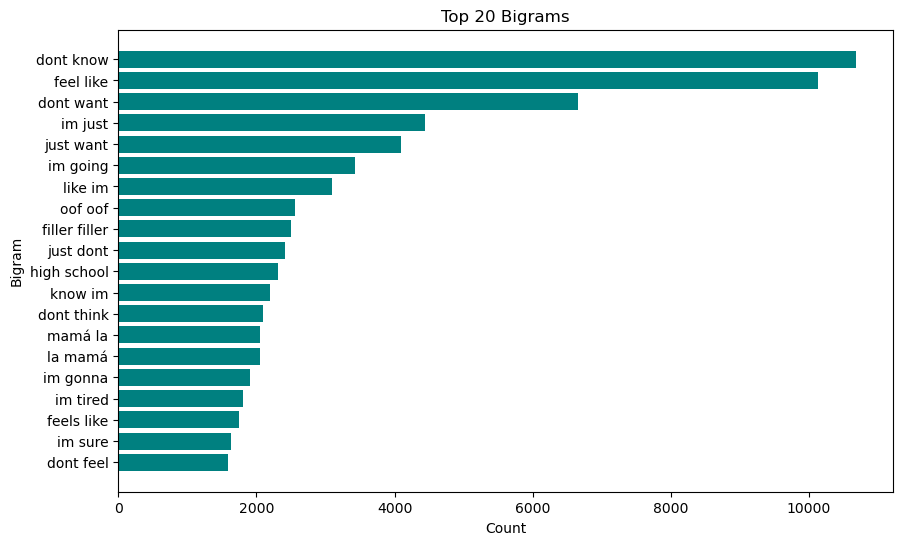

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(data['combined_text'])

# Use the sum of each feature directly from the sparse matrix
bigram_counts = X.sum(axis=0).A1  # A1 converts it to a flat array
bigrams = vectorizer.get_feature_names_out()

# Create a DataFrame with bigrams and their counts
bigram_freq = pd.DataFrame({'bigram': bigrams, 'count': bigram_counts})
bigram_freq = bigram_freq.sort_values(by='count', ascending=False).head(20)

# Plot the top 20 bigrams
plt.figure(figsize=(10, 6))
plt.barh(bigram_freq['bigram'], bigram_freq['count'], color='teal')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Top 20 Bigrams')
plt.gca().invert_yaxis()
plt.show()


In [17]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [18]:
import nltk
nltk.download('brown')
nltk.download('punkt')


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Cecily\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cecily\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

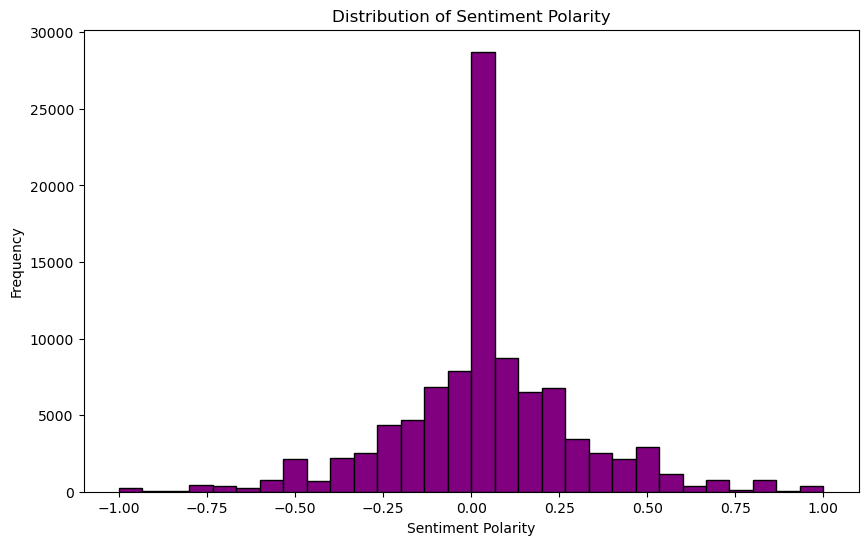

In [19]:
from textblob import TextBlob

# Calculate sentiment polarity
data['sentiment_polarity'] = data['combined_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(data['sentiment_polarity'], bins=30, color='purple', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity')
plt.show()


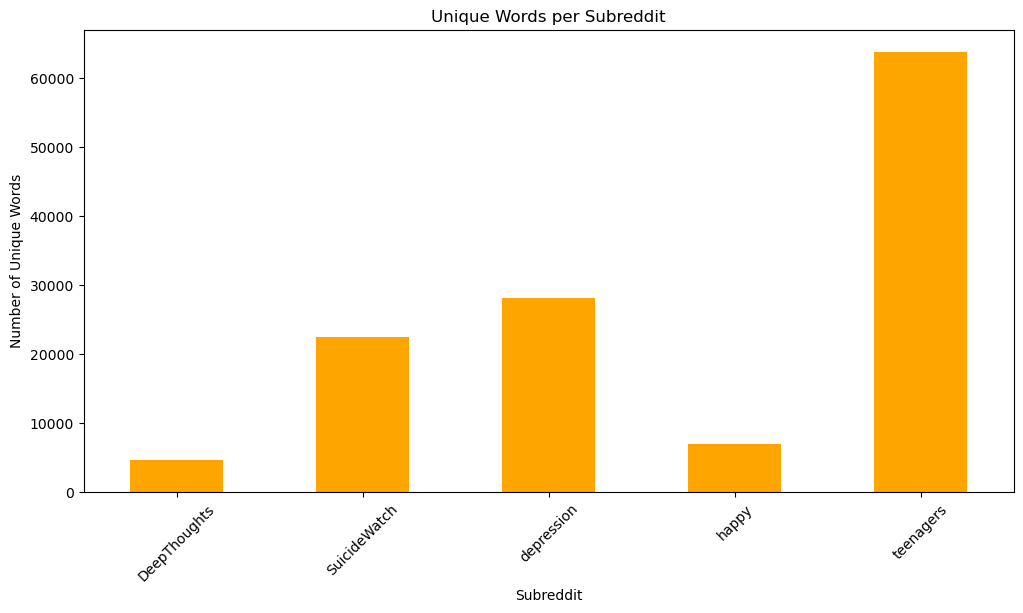

In [20]:
# Example: Count unique words per subreddit (or any category)
unique_words = data.groupby('subreddit')['tokens'].apply(lambda x: set([word for tokens in x for word in tokens]))
unique_word_count = unique_words.apply(len)

# Plot
unique_word_count.plot(kind='bar', figsize=(12, 6), color='orange')
plt.xlabel('Subreddit')
plt.ylabel('Number of Unique Words')
plt.title('Unique Words per Subreddit')
plt.xticks(rotation=45)
plt.show()


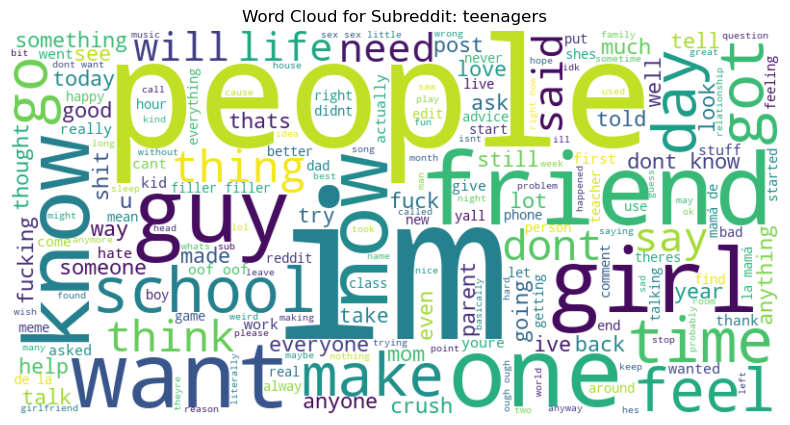

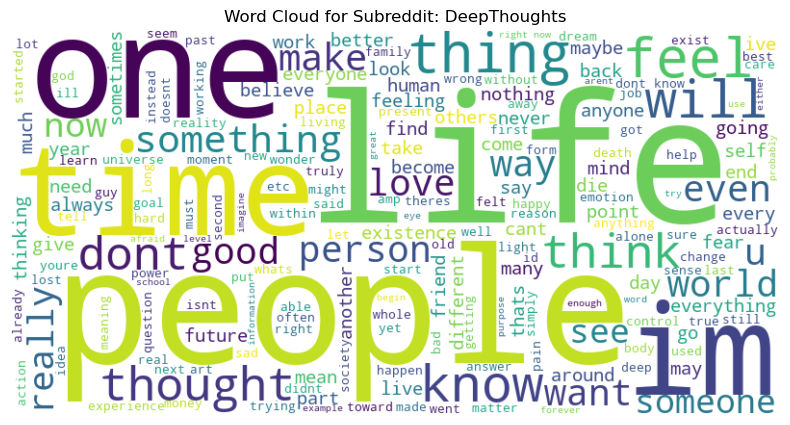

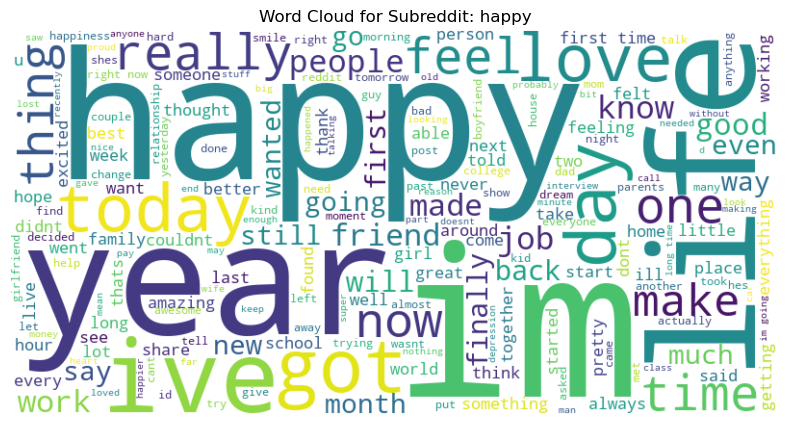

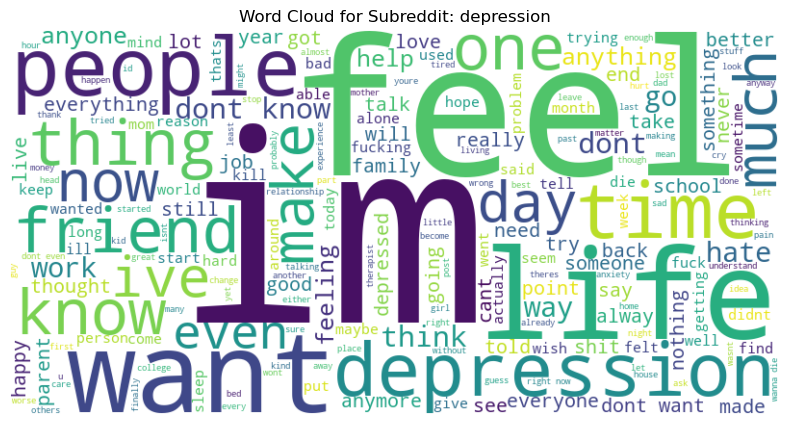

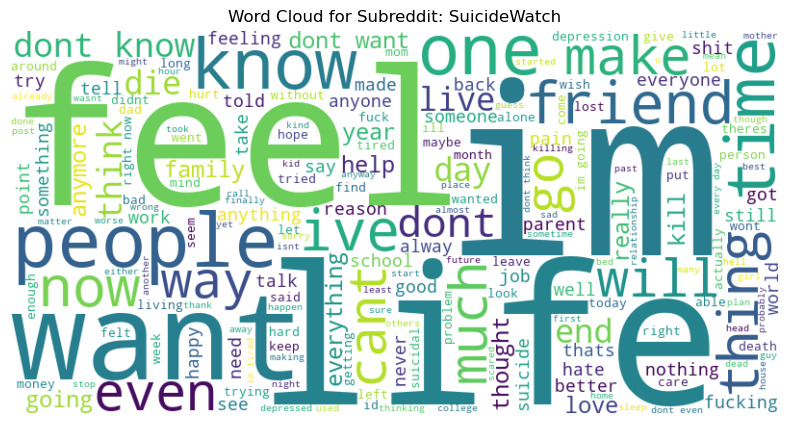

In [21]:
from wordcloud import WordCloud

# Generate word clouds for a specific category (e.g., subreddit)
for subreddit in data['subreddit'].unique():
    text = ' '.join(data.loc[data['subreddit'] == subreddit, 'combined_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Subreddit: {subreddit}')
    plt.axis('off')
    plt.show()


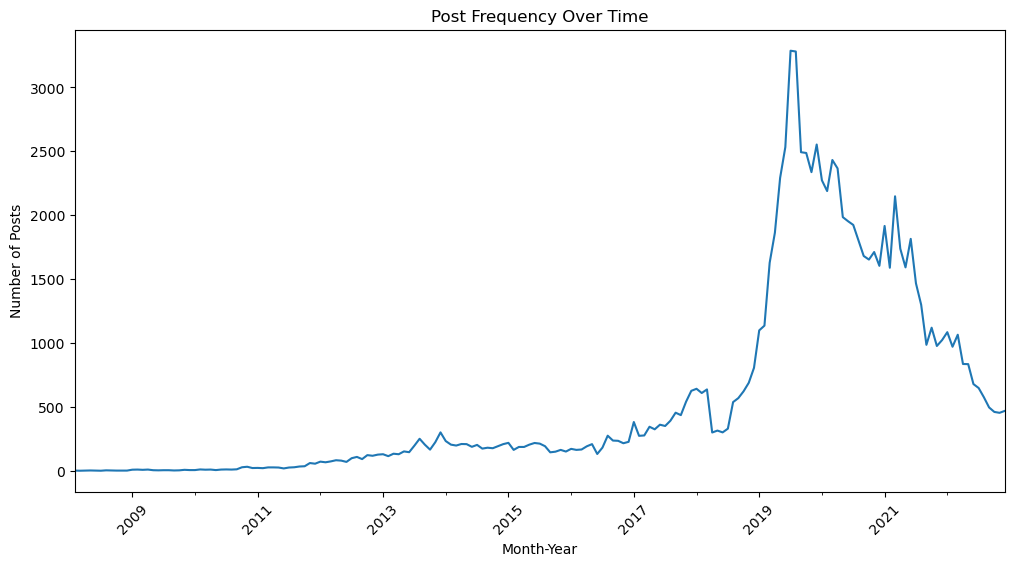

In [22]:
data['created_date'] = pd.to_datetime(data['created_utc'], unit='s')  # Convert Unix timestamp
data['month_year'] = data['created_date'].dt.to_period('M')

# Plot post counts over time
data.groupby('month_year').size().plot(kind='line', figsize=(12, 6))
plt.xlabel('Month-Year')
plt.ylabel('Number of Posts')
plt.title('Post Frequency Over Time')
plt.xticks(rotation=45)
plt.show()


In [23]:
# Summary statistics
print(data[['upvotes', 'num_comments']].describe())


            upvotes  num_comments
count  98826.000000  94297.000000
mean      62.315555     15.217069
std      937.347581     71.638197
min        4.000000      1.000000
25%        5.000000      4.000000
50%        7.000000      7.000000
75%       11.000000     14.000000
max    62899.000000   7880.000000


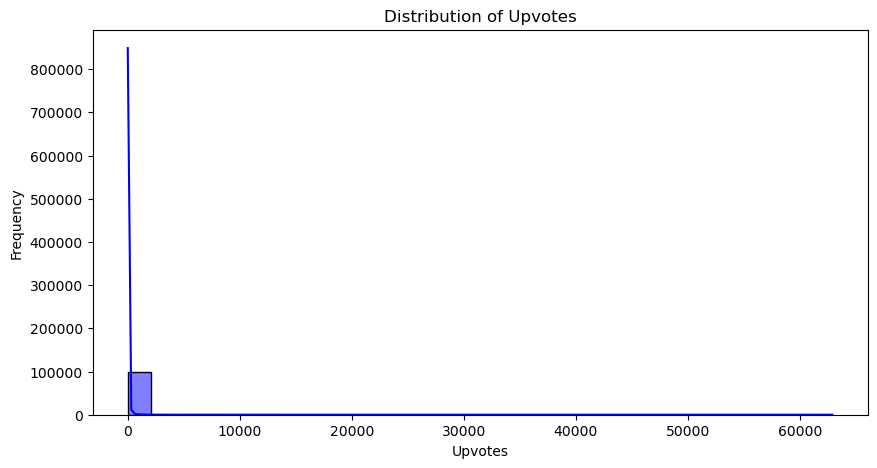

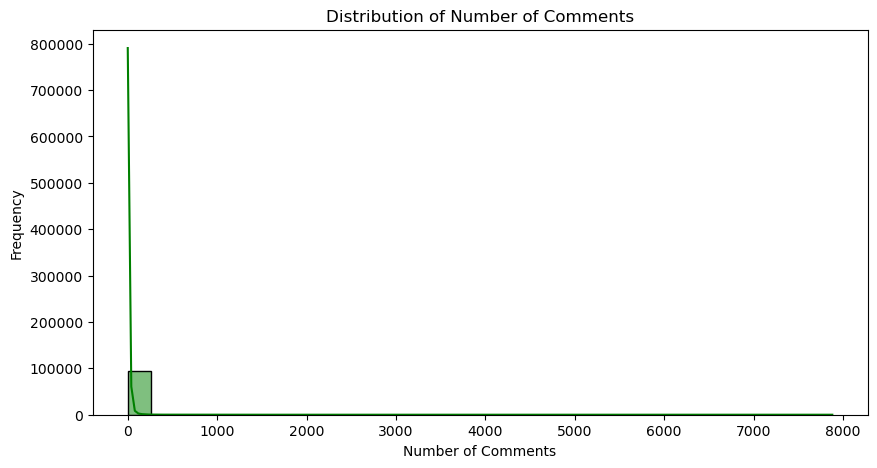

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of upvotes
plt.figure(figsize=(10, 5))
sns.histplot(data['upvotes'], bins=30, kde=True, color='blue')
plt.title('Distribution of Upvotes')
plt.xlabel('Upvotes')
plt.ylabel('Frequency')
plt.show()

# Distribution of num_comments
plt.figure(figsize=(10, 5))
sns.histplot(data['num_comments'], bins=30, kde=True, color='green')
plt.title('Distribution of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()


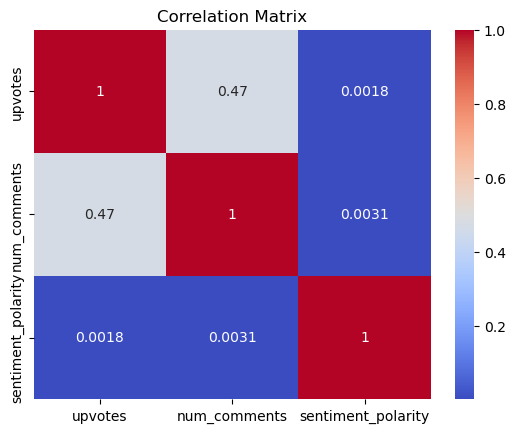

In [25]:
# Correlation matrix
correlation_matrix = data[['upvotes', 'num_comments', 'sentiment_polarity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # Adjust max_features based on your dataset size

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined_text'])

# Display the shape of the resulting TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

# Optionally, you can convert the matrix to a DataFrame for inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())


TF-IDF Matrix Shape: (98826, 1000)
   able  absolutely  abuse  abusive  accept  account  act  actual  actually  \
0   0.0         0.0    0.0      0.0     0.0      0.0  0.0     0.0       0.0   
1   0.0         0.0    0.0      0.0     0.0      0.0  0.0     0.0       0.0   
2   0.0         0.0    0.0      0.0     0.0      0.0  0.0     0.0       0.0   
3   0.0         0.0    0.0      0.0     0.0      0.0  0.0     0.0       0.0   
4   0.0         0.0    0.0      0.0     0.0      0.0  0.0     0.0       0.0   

   add  ...  years  yes  yesterday   yo  youll  young  younger  youre  \
0  0.0  ...    0.0  0.0        0.0  0.0    0.0    0.0      0.0    0.0   
1  0.0  ...    0.0  0.0        0.0  0.0    0.0    0.0      0.0    0.0   
2  0.0  ...    0.0  0.0        0.0  0.0    0.0    0.0      0.0    0.0   
3  0.0  ...    0.0  0.0        0.0  0.0    0.0    0.0      0.0    0.0   
4  0.0  ...    0.0  0.0        0.0  0.0    0.0    0.0      0.0    0.0   

   youtube  youve  
0      0.0    0.0  
1      0.0 

In [27]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install keras==2.11.0


Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install tensorflow==2.11.0


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.11.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.11.0


In [31]:
pip install keras==2.11.0


Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install torch torchvision torchaudio


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip uninstall tensorflow tensorflow-intel keras


In [ ]:
pip install tensorflow==2.11 keras==2.11


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.11 (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow==2.11


In [ ]:
 pip install streamlit



   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.6 MB 1.1 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/8.6 MB 1.2 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.6 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.6 MB 1.3 MB/s eta 0:00:06
   -------- ------------------------------- 1.8/8.6 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 2.1/8.6 MB 1.4 MB/s eta 0:00:05
   ---------- ----------------------------- 2.4/8.6 MB 1.4 MB/s eta 0:00:05
   ------------- -------------------------- 2.9/8.6 MB 1.4 MB/s eta 0:00:05
   -------------- ------------------------- 3.1/8.6 MB 1.4 MB/s eta 0:00:04
   --------------- ------------------------ 3.4/8.6 MB 1.4 MB/s eta 0:00:04
   ---------------- ------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
